## 2장 퍼셉트론
## 2.3 퍼셉트론 구현하기
### 2.3.1 간단한 구현부터

In [42]:
# x1과 x2를 인수로 받는 AND 함수
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [43]:
AND(0,0) 

0

In [44]:
AND(1,0)

0

In [45]:
AND(0,1)

0

In [46]:
AND(1,1)

1

### 2.3.2 가중치와 편향 도입

In [47]:
# 편향과 가중치를 도입한 구현
import numpy as np
x = np.array([0, 1]) # 입력
w = np.array([0.5, 0.5]) # 가중치
b = -0.7 # 편향
w*x

array([0. , 0.5])

In [48]:
np.sum(w*x)

0.5

In [49]:
np.sum(w*x)+b
# 약 -0.2의 값

-0.19999999999999996

### 가중치와 편향 구현하기 

In [50]:
# AND 게이트
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

# -theta가 편향 b로 치환됨

In [51]:
# NAND 게이트
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, 0.5])
    b = 0.7
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else:
        return 1

In [52]:
# OR 게이트
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1   

### 2.5.2 XOR 게이트 구현하기

In [53]:
# AND, NAND, OR 게이트 조합
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [54]:
XOR(0,0)

0

In [55]:
XOR(1,0)

1

In [56]:
XOR(0,1)

1

In [57]:
XOR(1,1)

1

# 3장 신경망
# 3.2 활성화 함수
## 3.2.2 계단 함수 구현하기

In [58]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [59]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [60]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [61]:
y = x > 0
y

array([False,  True,  True])

In [64]:
y = y.astype(np.int32)
y

array([0, 1, 1])

### 3.2.3 계단 함수의 그래프

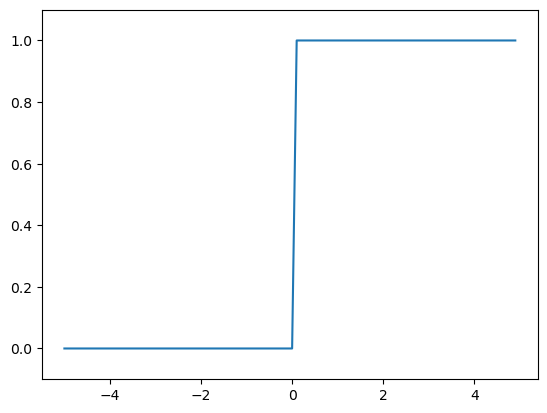

In [66]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0, dtype=np.int32)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [67]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [68]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [70]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [71]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

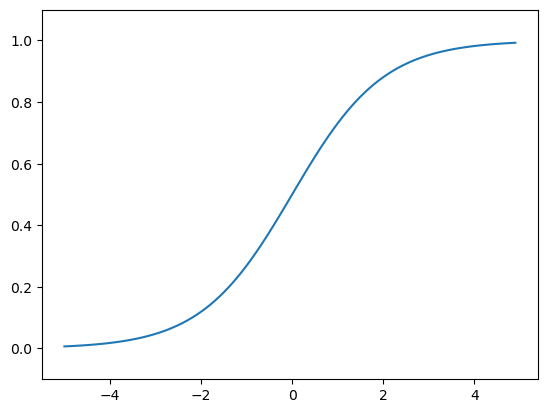

In [73]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 3.3 다차원 배열의 계산
### 3.3.1 다차원 배열

In [74]:
import numpy as np
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [75]:
np.ndim(A)

1

In [76]:
A.shape

(4,)

In [77]:
A.shape[0]

4

In [78]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [79]:
np.ndim(B)

2

In [80]:
B.shape

(3, 2)

### 3.3.2 행렬의 곱

In [81]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [83]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [84]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [85]:
A = np.array([[1,2,3],[4,5,6]])
A.shape

(2, 3)

In [86]:
B = np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [87]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [88]:
C = np.array([[1,2],[3,4]])
C.shape

(2, 2)

In [89]:
A.shape

(2, 3)

In [90]:
np.dot(A,C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [91]:
A = np.array([[1,2],[3,4],[5,6]])
A.shape

(3, 2)

In [94]:
B = np.array([7,8])
B.shape

(2,)

In [95]:
np.dot(A,B)

array([23, 53, 83])

### 3.3.3 신경망에서의 행렬 곱

In [96]:
X = np.array([1,2])
X.shape

(2,)

In [97]:
W = np.array([[1,3,5],[2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [98]:
W.shape

(2, 3)

In [99]:
Y = np.dot(X,W)
print(Y)

[ 5 11 17]
